In [9]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [11]:
image = X_train[0]

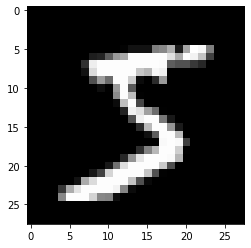

In [12]:
# 뽑아온 이미지 확인
plt.imshow(image, "gray")
plt.show()

In [13]:
# 실제 CNN 레이어에 집어넣기 위해서는 데이터가 4차원이 되어야 한다.
# (배치, 세로, 가로, 채널)

image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Conv2D 사용하기
- filters : 필터의 개수
- kernel_size : 필터의 크기
- strides : 몇 개의 픽셀을 스킵하면서 필터가 훑게 할지
- padding : 0으로 쌓여진 패딩을 만들것인지에 대한 설정
  - VALID : 패딩 만들지 않기
  - SAME : 패딩 만들기
- activation : 활성화 함수 지정, 지정하지 않고 따로 레이어로 추가할수도 있음

In [14]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3),  # 필터가 3개, 필터의 크기는 3*3
                       strides=(1,1),  # (가로, 세로) : 필터가 가로로 1px, 세로로 1px 이동한다.
                       padding="SAME",  # 패딩 적용하기
                       activation="relu"  # 활성화함수는 ReLU 사용
                       )

In [16]:
# 필터의 가로, 세로 크기 및 스트라이드의 가로 세로를 똑같이 하려면 튜플을 사용할 필요가 없다.
# 가로, 세로의 크기를 다르게 하려면 위처럼 튜플 사용

In [18]:
tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=1, padding="SAME", activation="relu")
# 이렇게 하면 가로, 세로의 크기는 동일

# Convolution 레이어 시각화 하기

In [23]:
# image를 tensorflow 배열로 만들기
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [24]:
layer = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding="SAME")

In [25]:
output = layer(image)
output.shape

TensorShape([1, 28, 28, 5])

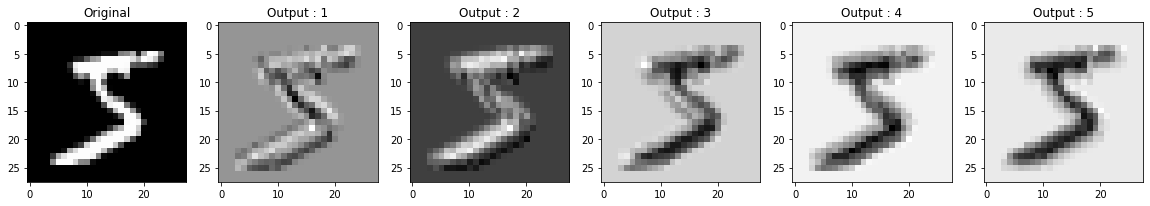

In [39]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0,...,0], cmap="gray")
axes[0].set_title("Original")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("Output : {}".format(idx + 1))
  ax.imshow(output[0, ..., idx], cmap="gray")
  
plt.show()

In [34]:
# 이미지 4, 5번째꺼가 동일
# 필터는 그렇게 만힝 필요하진 않다.

# Filter 시각화 하기
CNN 의 Filter값을 확인한다는 뜻은 가중치를 확인하겠다는 뜻이 된다.

In [49]:
# 케라스의 모든 계산가능한 레이어는 각 레이어의 매개변수를 리턴할 수 있다.
# - get_weights() 사용
# Conv2D 레이어와 필터의 모양 : (필터세로, 필터가로, 채널수, 필터개수)
# (3, 3, 1, 5)

# bias의 갯수? 5개 (필터 1개당 bias 1개니까)
weights = layer.get_weights()
# weight[0] : 가중치
# weight[1] : 편향
weights[0].shape, weights[1].shape  # 가중치의 shape, 편향의 shape

((3, 3, 1, 5), (5,))

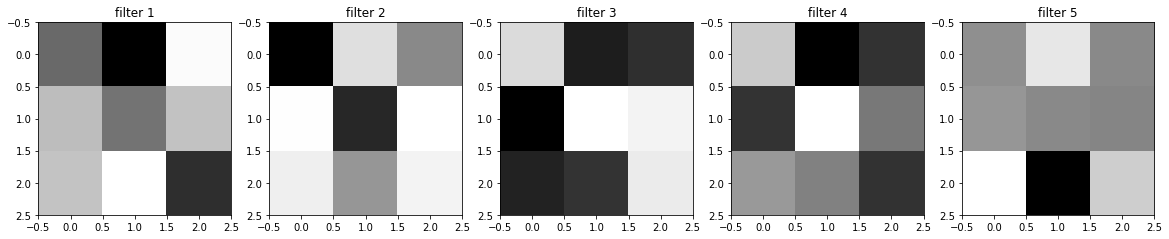

In [51]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("filter {}".format(idx + 1))
  ax.imshow(weights[0][:, :, 0, idx], cmap="gray")  # 3,3,0,idx

plt.show()

In [52]:
# 랜덤으로 쪼개놓은 것이기 때문에 알아볼 수 없음.
# 필터의 사이즈가 작기도 하고

# ReLU 레이어 확인하기

In [53]:
import numpy as np
np.min(output), np.max(output)

(-222.39386, 189.53656)

In [54]:
# ReLU에 의해 음수 데이터는 다 사라질 것이다.
act_layer = tf.keras.layers.ReLU()  # 활성화 함수 ReLU
act_output = act_layer(output)  # 합성곱의 결과가 활성화 함수로 들어간다.
act_output.shape  # (1, 28, 28, 5)
# 필터를 해서 나왔어도 (1, 28, 28, 5)

TensorShape([1, 28, 28, 5])

In [56]:
np.min(act_output), np.max(act_output)

(0.0, 189.53656)

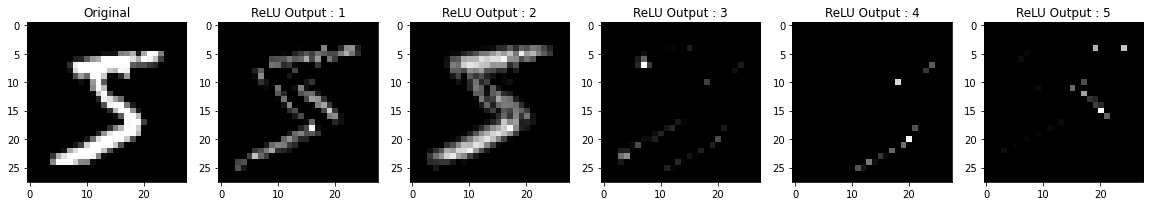

In [58]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0,...,0], cmap="gray")
axes[0].set_title("Original")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap="gray")
  
plt.show()

# MaxPooling 레이어 확인하기

In [61]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="SAME")  # 반만 줄어든다.
pool_output = pool_layer(act_output)  # ReLU 의 결과물이 들어간다.

pool_output.shape  
# stride가 커지면 이미지는 작아진다.

TensorShape([1, 14, 14, 5])

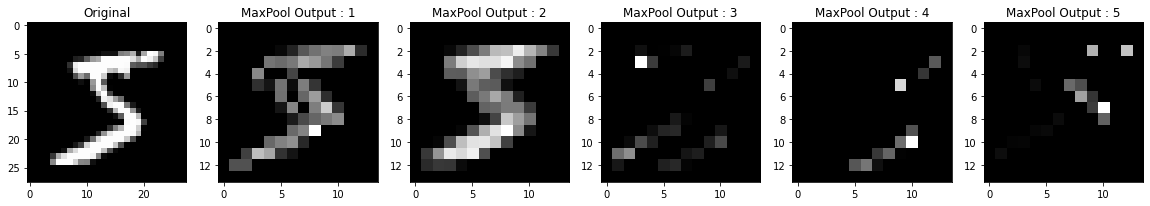

In [63]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0,...,0], cmap="gray")
axes[0].set_title("Original")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("MaxPool Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap="gray")
  
plt.show()

In [64]:
# 아까보다 정보가 손실이 되었다.
# 그래도 5라는 거 보기에는 부족함은 없어보인다.

In [65]:
# 여기까지가 특징 추출 과정

# Flatten 레이어 확인하기
- MaxPool2D 까지는 특징 추출 과정이다.
  - 예측을 위한 과정이 아닌, 데이터에 대한 특징만 추출함
- 예측을 하기 위해서는 Fully Connected Layer가 필요함
  - Dense 레이어 사용
- Fully Connected Layer를 사용하기 위해서는 데이터가 평탄화되어있어야 함.

In [66]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)

flatten_output.shape

TensorShape([1, 980])

In [67]:
# flatten. 평탄화.
# 이미지 1개의 배열을 980개의 배열로 쭉 늘어뜨림

In [68]:
pool_output.shape

TensorShape([1, 14, 14, 5])

In [69]:
14 * 14 * 5

980

In [70]:
# 그래서 980이 된 것임.

# Dense 레이어 확인하기
- 계산 과정을 위한 Dense 레이어 - Fully Connected 레이어라고도 한다.

In [71]:
# 예측을 위한 dense 레이어 만들기
# 유닛이 32개인 Dense Layer(Affine 레이어 또는 Fully Connected Layer)
dense_layer = tf.keras.layers.Dense(32, activation="relu")
dense_output = dense_layer(flatten_output)

dense_output.shape  # 32개의 유닛이었으니까 1, 32

TensorShape([1, 32])

In [72]:
# 980개의 입력값을 받는 32개의 뉴런

In [73]:
# 출력층 꾸미기
# 출력 클래스의 갯수, 출력 함수 필요
dense_layer2 = tf.keras.layers.Dense(10, activation="relu")
dense_output2 = dense_layer2(dense_output)

dense_output2.shape

TensorShape([1, 10])

In [74]:
# 지금 softmax를 안 쓰는 이유는 y_train 때문에 훈련이 안 되서 그렇다.
# ?

In [75]:
# 32개를 받는 10개의 이미지

In [79]:
# Feature Extraction을 위한 레이어
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D

# Classification을 위한 레이어
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [80]:
# 1. 입력 데이터의 형상(배치 사이즈 제외)
input_shape = (28, 28, 1)

# 2. 분류할 클래스의 갯수
num_classes = 10

In [81]:
# 배치사이즈는 자동으로 None 으로 들어가서 알아서 지정이 됨

# 지금은 계산 그래프를 그리는 과정
# 몇 개가 들어올지 모른다.
# 몇 개가 들어와도 계산할 수 있도록 계산그래프를 준비하는 과정

In [83]:
# 원본 데이터를 입력받는 레이어
inputs = Input(shape=input_shape)

# Feature Extraction - Convolution 레이어
# 컨볼루젼, 활성화, 맥스풀링(선택) 순서로 쌓는다.
net = Conv2D(32, 3, padding="SAME")(inputs)
net = Activation("relu")(net)
net = Conv2D(32, 3, padding="SAME")(net)
net = Activation("relu")(net)
net = MaxPool2D((2,2))(net)
net = Dropout(0.25)(net)  # 25% 사용하지 않겠다.

# 여기서 더 하고 싶으면 컨볼루젼 레이어 더 사용해도 됨
net = Conv2D(64, 3, padding="SAME")(net)
net = Activation("relu")(net)
net = Conv2D(64, 3, padding="SAME")(net)
net = Activation("relu")(net)
net = MaxPool2D((2,2))(net)
net = Dropout(0.25)(net)

# Fully Connected 구성하기
net = Flatten()(net)
net = Dense(512)(net)  # 펼쳤으니까 Dense로 계산
net = Activation("relu")(net)
net = Dropout(0.25)(net)  # 과대적합을 막아준다.

# 출력층 구성하기
net = Dense(num_classes)(net)
net = Activation("softmax")(net)

# 계산 그래프 그리기
# 레이어드 쌓아놓은 것 뿐이고 실제 사용을 하려면 모델을 만들어야 함
# 이 위까지 과정이 모델링
# 밑에가 진짜 모델 만드는 과정
model = tf.keras.Model(inputs=inputs,  # input layer
                       outputs=net,
                       name="CNN_ARABOZA")  # 이름은 마음대로

# 이 과정을 functional modeling 이라고 한다.

In [84]:
model.summary()

Model: "CNN_ARABOZA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        

In [85]:
# params 갯수 계산 직접 해보세요

# 최적화 선정하기
- Loss Function (손실 함수) - MSE, CEE를 쓸지 등등..
- Optimization (최적화 함수) - SGD, ARAM, RMSProps를 쓸지 등등..
- Metrics (테스트셋에 대한 평가 기준)

## Loss Function 선정 기준
- Binary Classification
- Categorical Classification

주로 MSE 사용 안하고 cross entropy 사용함
1. 이진 분류 시에는 binary_crossentropy
2. 다중 분류 시에는 categorical_crossentropy

In [86]:
# 우리는 라벨이 10개이니까 다중 분류
# categorical_crossentropy 사용

### Categorical CrossEntropy의 종류
- Label이 0, 1, 2 같은 형태며
  - sparse categorical cross entropy
- Label이 OHE(One Hot Encoding)되어있는 경우
  - categorical cross entropy

In [87]:
# LOSS 선정을 위해 y_train 확인
y_train[:3]

array([5, 0, 4], dtype=uint8)

sparse_categorical_crossentropy 사용하자.

In [88]:
loss_func = tf.keras.losses.sparse_categorical_crossentropy
loss_func

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy>

In [89]:
# 레이블이 OHE 되어 있으면 쓰자
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy>

In [90]:
# 이진 분류 시에 쓰자
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy>

## Metrics
- 테스트 세트의 평가 방식 (evaluate)

In [91]:
metrics = ["accuracy"]  # ["acc"], [tf.keras.metrics.Accuracy()]  # 모두 동일
# 대표적으로 많이 쓰는 방식.

## Optimizer 선정하기
- sgd - tf.keras.optimizers.SGD()
- rmsprop - tf.keras.optimizers.RMSprop()
- adam - tf.keras.optimizers.Adam()

In [92]:
optm = tf.keras.optimizers.Adam()

# 모델 컴파일
- 실제 모델 만드는 과정

In [93]:
# 아직도 데이터는 필요 없음
# 모양만 만들어 놓는 것.

In [94]:
model.compile(optimizer=optm, loss=loss_func, metrics=metrics)

# 데이터 전처리 하기

In [95]:
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

In [96]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [97]:
# 정규화 작업 (스케일링 처리)
X_train = X_train / 255.0
X_test = X_test / 255.0

print(np.min(X_train), np.max(X_train))
print(np.min(X_test), np.max(X_test))

0.0 1.0
0.0 1.0


In [98]:
# 0~1로 만들어 주었음.

In [99]:
# 원래는 이미지 수직 반전, 기울이기 등등 해줘야 함
# 나중에 할거임

# 학습용 하이퍼 파라미터 설정
- num_epochs
- batch_size

In [100]:
num_epochs=10
batch_size=32

model.fit(
    X_train,  # 데이터
    y_train,  # label
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=True
)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1269 - accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0387 - accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0261 - accuracy: 0.9920
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0241 - accuracy: 0.9921
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0214 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0187 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.017

In [101]:
# 학습 할 수록 성능 향상

# 예측

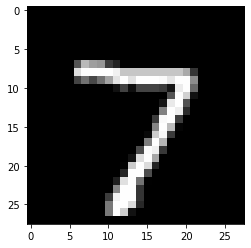

In [102]:
test_img = X_test[0, :, :, 0]
plt.imshow(test_img, "gray")
plt.show()

In [105]:
test_img.shape

(28, 28)

In [111]:
test_img = test_img[tf.newaxis, ..., tf.newaxis]
test_img.shape

(1, 28, 28, 1)

In [112]:
prediction = model.predict(test_img)
np.argmax(prediction)

7

In [113]:
y_test[0]

7

In [114]:
model.predict(test_img)  # 예측 확률

array([[4.6010008e-11, 1.3524590e-10, 1.3654057e-10, 7.5098744e-10,
        3.9126320e-11, 6.9929865e-12, 3.8372392e-15, 1.0000000e+00,
        4.3106480e-11, 5.5481700e-12]], dtype=float32)

In [115]:
# 7번 클래스일 확률이 100%